In [3]:
# import library and adjust it as your key
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

# let's make automating API pull
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a993ed64-f0cc-4da0-b735-42aa45b88239',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # # Use this if you just want to keep it in a dataframe
    # df = pd.json_normalize(data['data'])
    # df['timestamp'] = pd.to_datetime('now')
    # df = pd.concat([df,df])


    # Use this if you want to create a csv and append data to it
    df_crypto = pd.json_normalize(data['data'])
    df_crypto['timestamp'] = pd.to_datetime('now')
    df_crypto

    if not os.path.isfile(r'/Users/sitirosliyana/Desktop/1. Onad/sheet/API.csv'):
        df_crypto.to_csv(r'/Users/sitirosliyana/Desktop/1. Onad/sheet/API.csv', header='column_names')
    else:
        df_crypto.to_csv(r'/Users/sitirosliyana/Desktop/1. Onad/sheet/API.csv', mode='a', header=False)
        
    # Then to read in the file: df = pd.read_csv(r'/Users/sitirosliyana/Desktop/1. Onad/sheet/API.csv')

In [4]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [5]:
df = pd.read_csv(r'/Users/sitirosliyana/Desktop/1. Onad/sheet/API.csv')

In [6]:
#This allows you to see all the columns, not just like some
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.960702e+07,1.960702e+07,False,NaN,1,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,40197.783376,2.755881e+10,-11.2453,0.350060,3.224001,-6.011008,-6.728438,6.571881,17.197033,7.881587e+11,50.3643,8.441535e+11,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
1,1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,2244.888492,1.415215e+10,-2.6591,0.174178,0.688275,-11.803950,-1.318605,8.066167,22.600425,2.697887e+11,17.2398,2.697887e+11,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
2,2,825,Tether USDt,USDT,tether,72907,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,0.999534,4.767437e+10,-7.9653,0.034632,0.027495,-0.030509,-0.056949,-0.094931,-0.064460,9.553224e+10,6.1046,9.855478e+10,NaN,2024-01-24T11:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 18:17:10.415609
3,3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,294.791956,1.023476e+09,1.2839,0.381559,-0.459094,-4.472237,11.484315,26.020136,30.558158,4.408562e+10,2.8171,4.408562e+10,NaN,2024-01-24T11:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
4,4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.331530e+08,5.678937e+08,True,NaN,5,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,87.224981,2.945390e+09,1.2984,0.544781,9.002345,-14.059482,-21.373552,50.354338,171.227125,3.778176e+10,2.4143,4.953452e+10,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
5,5,52,XRP,XRP,xrp,1215,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,0.516404,1.168333e+09,-10.5413,0.470512,1.982182,-9.517344,-19.717711,-16.730690,-8.002204,2.806132e+10,1.7932,5.164042e+10,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
6,6,3408,USDC,USDC,usd-coin,16360,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.573481e+10,2.573481e+10,False,NaN,7,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,0.999934,6.429505e+09,-9.1977,-0.011139,-0.020854,-0.031607,-0.020436,-0.000303,-0.012166,2.573310e+10,1.6444,2.573310e+10,NaN,2024-01-24T11:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 18:17:10.415609
7,7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.541015e+10,3.655708e+10,False,NaN,8,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,0.475940,5.013752e+08,-0.0764,0.481079,3.805720,-10.898516,-21.388484,22.097534,62.981405,1.685309e+10,1.0769,2.141728e+10,NaN,2024-01-24T11:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
8,8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-

In [8]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
# if you wanna delete index you don't need
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19607018.00000,19607018.00000,False,NaN,1,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,40197.78338,27558808881.04340,-11.24530,0.35006,3.22400,-6.01101,-6.72844,6.57188,17.19703,788158662220.69971,50.36430,844153450903.89001,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120179114.19818,120179114.19818,True,NaN,2,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,2244.88849,14152147655.47173,-2.65910,0.17418,0.68827,-11.80395,-1.31860,8.06617,22.60043,269788710497.15369,17.23980,269788710497.14999,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
2,825,Tether USDt,USDT,tether,72907,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95576820991.71840,98600769245.77876,True,NaN,3,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,0.99953,47674365150.99310,-7.96530,0.03463,0.02750,-0.03051,-0.05695,-0.09493,-0.06446,95532244304.11514,6.10460,98554782199.52000,NaN,2024-01-24T11:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 18:17:10.415609
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149548236.09601,149548236.09601,False,NaN,4,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,294.79196,1023475787.62813,1.28390,0.38156,-0.45909,-4.47224,11.48432,26.02014,30.55816,44085617034.80868,2.81710,44085617034.81000,NaN,2024-01-24T11:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,433153013.38128,567893675.12464,True,NaN,5,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,87.22498,2945390026.38027,1.29840,0.54478,9.00235,-14.05948,-21.37355,50.35434,171.22712,37781763545.57166,2.41430,49534515263.08000,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
5,52,XRP,XRP,xrp,1215,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54339837528.00000,99987984506.00000,False,NaN,6,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,0.51640,1168332554.85692,-10.54130,0.47051,1.98218,-9.51734,-19.71771,-16.73069,-8.00220,28061322730.71665,1.79320,51640424423.90000,NaN,2024-01-24T11:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 18:17:10.415609
6,3408,USDC,USDC,usd-coin,16360,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25734810251.85611,25734810251.85611,False,NaN,7,NaN,NaN,NaN,2024-01-24T11:16:00.000Z,0.99993,6429504912.78012,-9.19770,-0.01114,-0.02085,-0.03161,-0.02044,-0.00030,-0.01217,25733102064.42593,1.64440,25733102064.43000,NaN,2024-01-24T11:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 18:17:10.415609
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35410150583.72000,36557079073.56500,False,NaN,8,NaN,NaN,NaN,2024-01-24T11:15:00.000Z,0.47594,501375219.66233,-0.07640,0.48108,3.80572,-10.89852,-21.38848,22.09753,62.98140,16853094193.85622,1.07690,21417283638.22000,NaN,2024-01-24T11:15:00.000Z,NaN,NaN,NaN,

In [11]:
# Now let's look at the coin trends over time

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27704,3.10130,-6.04455,-6.81320,6.50546,17.11669
Ethereum,0.15569,0.62484,-11.83872,-1.37496,8.03906,22.51318
Tether USDt,0.01556,0.01627,-0.01643,-0.07715,-0.10710,-0.07797
BNB,0.22886,-0.54804,-4.42689,11.43558,25.90503,30.51134
Solana,0.39743,8.82188,-14.15651,-21.52380,50.15904,170.97517
XRP,0.45463,1.94166,-9.53913,-19.73115,-16.75395,-8.02946
USDC,0.00088,-0.00456,-0.01182,-0.00429,0.01372,0.00274
Cardano,0.37515,3.75217,-10.85566,-21.41044,22.06557,62.87938
Avalanche,0.71987,12.60136,-13.60207,-32.14496,50.43279,179.28671


In [12]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.27704
             quote.USD.percent_change_24h     3.10130
             quote.USD.percent_change_7d     -6.04455
             quote.USD.percent_change_30d    -6.81320
             quote.USD.percent_change_60d     6.50546
             quote.USD.percent_change_90d    17.11669
Ethereum     quote.USD.percent_change_1h      0.15569
             quote.USD.percent_change_24h     0.62484
             quote.USD.percent_change_7d    -11.83872
             quote.USD.percent_change_30d    -1.37496
             quote.USD.percent_change_60d     8.03906
             quote.USD.percent_change_90d    22.51318
Tether USDt  quote.USD.percent_change_1h      0.01556
             quote.USD.percent_change_24h     0.01627
             quote.USD.percent_change_7d     -0.01643
             quote.USD.percent_change_30d    -0.07715
             quote.USD.percent_change_60d    -0.10710
             quote.USD.percent_change_90

In [13]:
df4 = df3.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.27704
            quote.USD.percent_change_24h   3.10130
            quote.USD.percent_change_7d   -6.04455
            quote.USD.percent_change_30d  -6.81320
            quote.USD.percent_change_60d   6.50546
            quote.USD.percent_change_90d  17.11669
Ethereum    quote.USD.percent_change_1h    0.15569
            quote.USD.percent_change_24h   0.62484
            quote.USD.percent_change_7d  -11.83872
            quote.USD.percent_change_30d  -1.37496
            quote.USD.percent_change_60d   8.03906
            quote.USD.percent_change_90d  22.51318
Tether USDt quote.USD.percent_change_1h    0.01556
            quote.USD.percent_change_24h   0.01627
            quote.USD.percent_change_7d   -0.01643
            quote.USD.percent_change_30d  -0.07715
            quote.USD.percent_change_60d  -0.10710
            quote.USD.percent_change_90d  -0.07797
BNB         quote.USD.percent_change_1h    0.22886
            quote.USD.percent_change_24h  -0.54804
            quote.USD.percent_change_7d   -4.42689
            quote.USD.percent_change_30d  11.43558
            quote.USD.percent_change_60d  25.90503
            quote.USD.percent_change_90d  30.51134
Solana      quote.USD.percent_change_1h    0.39743
            quote.USD.percent_change_24h   8.82188
            quote.USD.percent_change_7d  -14.15651
            quote.USD.percent_change_30d -21.52380
            quote.USD.percent_change_60d  50.15904
            quote.USD.percent_change_90d 170.97517
XRP         quote.USD.percent_change_1h    0.45463
            quote.USD.percent_change_24h   1.94166
            quote.USD.percent_change_7d   -9.53913
            quote.USD.percent_change_30d -19.73115
            quote.USD.percent_change_60d -16.75395
            quote.USD.percent_change_90d  -8.02946
USDC        quote.USD.percent_change_1h    0.00088
            quote.USD.percent_change_24h  -0.00456
            quote.USD.percent_change_7d   -0.01182
            quote.USD.percent_change_30d  -0.00429
            quote.USD.percent_change_60d   0.01372
            quote.USD.percent_change_90d   0.00274
Cardano     quote.USD.percent_change_1h    0.37515
            quote.USD.percent_change_24h   3.75217
            quote.USD.percent_change_7d  -10.85566
            quote.USD.percent_change_30d -21.41044
            quote.USD.percent_change_60d  22.06557
            quote.USD.percent_change_90d  62.87938
Avalanche   quote.USD.percent_change_1h    0.71987
            quote.USD.percent_change_24h  12.60136
            quote.USD.percent_change_7d  -13.60207
            quote.USD.percent_change_30d -32.14496
            quote.USD.percent_change_60d  50.43279
            quote.USD.percent_change_90d 179.28671
Dogecoin    quote.USD.percent_change_1h   -0.36769
            quote.USD.percent_change_24h   3.91373
            quote.USD.percent_change_7d   -1.21266
            quote.USD.percent_change_30d -14.09813
            quote.USD.percent_change_60d   2.30335
            quote.USD.percent_change_90d   9.47318
TRON        quote.USD.percent_change_1h    0.04274
            quote.USD.percent_change_24h   1.05904
            quote.USD.percent_change_7d   -0.75888
            quote.USD.percent_change_30d   0.48746
            quote.USD.percent_change_60d   2.64652
            quote.USD.percent_change_90d  15.94362
Polkadot    quote.USD.percent_change_1h    0.61719
            quote.USD.percent_change_24h   6.45660
            quote.USD.percent_change_7d  -12.36724
            quote.USD.percent_change_30d -29.56618
            quote.USD.percent_change_60d  22.78283
            quote.USD.percent_change_90d  48.73486
Chainlink   quote.USD.percent_change_1h    0.35548
            quote.USD.percent_change_24h   1.72744
            quote.USD.percent_change_7d  -10.06465
            quote.USD.percent_change_30d  -6.12000
            quote.USD.percent_change_60d  -3.64537
            quo

In [14]:
# let's reset the index
df5 = df4.reset_index()
df5


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27704
1,Bitcoin,quote.USD.percent_change_24h,3.10130
2,Bitcoin,quote.USD.percent_change_7d,-6.04455
3,Bitcoin,quote.USD.percent_change_30d,-6.81320
4,Bitcoin,quote.USD.percent_change_60d,6.50546
5,Bitcoin,quote.USD.percent_change_90d,17.11669
6,Ethereum,quote.USD.percent_change_1h,0.15569
7,Ethereum,quote.USD.percent_change_24h,0.62484
8,Ethereum,quote.USD.percent_change_7d,-11.83872
9,Ethereum,quote.USD.percent_change_30d,-1.37496


In [15]:
# Change the column name

df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27704
1,Bitcoin,quote.USD.percent_change_24h,3.10130
2,Bitcoin,quote.USD.percent_change_7d,-6.04455
3,Bitcoin,quote.USD.percent_change_30d,-6.81320
4,Bitcoin,quote.USD.percent_change_60d,6.50546
5,Bitcoin,quote.USD.percent_change_90d,17.11669
6,Ethereum,quote.USD.percent_change_1h,0.15569
7,Ethereum,quote.USD.percent_change_24h,0.62484
8,Ethereum,quote.USD.percent_change_7d,-11.83872
9,Ethereum,quote.USD.percent_change_30d,-1.37496


In [16]:
# rename the percent_change column value to shorter ones
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.27704
1,Bitcoin,24h,3.10130
2,Bitcoin,7d,-6.04455
3,Bitcoin,30d,-6.81320
4,Bitcoin,60d,6.50546
5,Bitcoin,90d,17.11669
6,Ethereum,1h,0.15569
7,Ethereum,24h,0.62484
8,Ethereum,7d,-11.83872
9,Ethereum,30d,-1.37496


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2000x500 with 0 Axes>

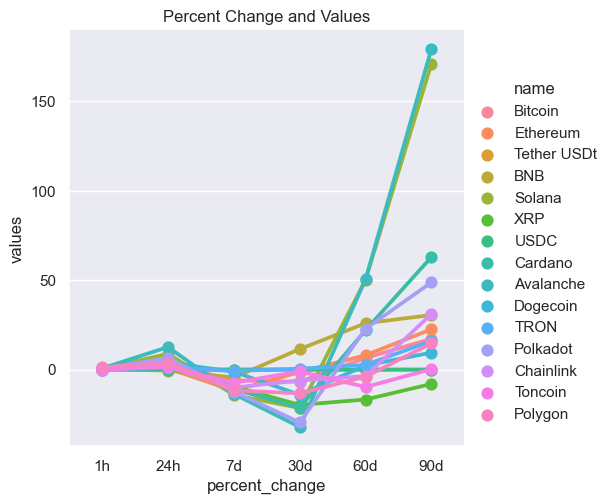

In [49]:
plt.figure(figsize=(20,5))
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')
plt.title('Percent Change and Values')
plt.show()

In [37]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name in ('Bitcoin')").sort_values(by='name')
df7

,name,quote.USD.price,timestamp
0,Bitcoin,40197.78338,2024-01-24 18:17:10.415609
15,Bitcoin,40168.20039,2024-01-24 18:18:11.348881
30,Bitcoin,40154.39577,2024-01-24 18:19:12.190446
45,Bitcoin,40140.32480,2024-01-24 18:20:13.097939


In [38]:
df8=df7.copy()
df8['time'] = pd.to_datetime(df8['timestamp']).dt.strftime('%H:%M:%S')
df8=df8.drop('timestamp', axis=1)
df8

,name,quote.USD.price,time
0,Bitcoin,40197.78338,18:17:10
15,Bitcoin,40168.20039,18:18:11
30,Bitcoin,40154.39577,18:19:12
45,Bitcoin,40140.32480,18:20:13


/Users/sitirosliyana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sitirosliyana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sitirosliyana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


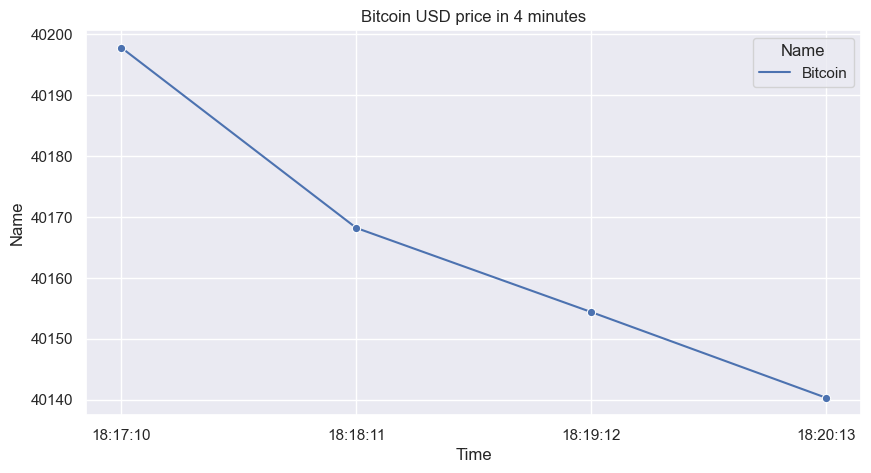

In [52]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,5))
# Membuat line plot dengan Seaborn
sns.lineplot(x='time', y='quote.USD.price', hue='name', data = df8, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Bitcoin USD price in 4 minutes')
plt.xlabel('Time')
plt.ylabel('Name')

# Menampilkan legenda
plt.legend(title='Name', loc='upper right')

# Menampilkan plot
plt.show()